# <span style="color:#37464f"><center>**Yannick NOUDJOUKOUANG**</center></span>
### **<center>JEDHA (FULLSTACK - 2021)</center>**
# **<center>UNSUPERVISED MACHINE LEARNING</center>**

---


## <span>**PLAN**</span>

1. Introduction
2. Data collection & EDA
3. Data analysis & vizualisation
4. Unsupervised Machine Learning & Clustering
5. Conclusion

---


### **1. Introduction**
---

**Good to know** : Contrary to Supervised Machine Learning, Unsupervised Learning corresponds to situations in which we do not have a target variable that we are trying to predict, but we hypothesize that the data we have can be compared within groups.


<p align="center"><center>
  <img width="600" height="200" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png">
</center>
    
</p>

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮



### **2. Data collection & EDA**
---

## A) IMPORT LIBRARIES

In [1]:
!pip install plotly -q

In [2]:
import pandas as pd
import requests
from datetime import datetime
from sklearn.cluster import DBSCAN
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

## B) EXPLORATORY DATA ANALYSIS

### 1. Dataset overview

In [3]:
#Import and read the csv : Uber
df = pd.read_csv('uber-raw-data-may14.csv')
display(df.sample(5))
df.shape

,Date/Time,Lat,Lon,Base
35853,5/31/2014 8:19:00,40.7740,-73.9787,B02512
452066,5/5/2014 8:39:00,40.7615,-74.0000,B02682
390597,5/24/2014 18:16:00,40.7520,-73.9684,B02617
487222,5/9/2014 17:51:00,40.7332,-74.0056,B02682
210470,5/21/2014 8:58:00,40.7702,-73.9804,B02598


(652435, 4)

In [4]:
print('Rough analysis')
print(df.info())
print(' ')
print('------------------')
print(' ')
print(df.nunique())
print(' ')
print('------------------')
print(' ')
print('* The dataset has initially {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Rough analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  652435 non-null  object 
 1   Lat        652435 non-null  float64
 2   Lon        652435 non-null  float64
 3   Base       652435 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.9+ MB
None
 
------------------
 
Date/Time    43900
Lat           4468
Lon           6090
Base             5
dtype: int64
 
------------------
 
* The dataset has initially 652435 rows and 4 columns.


In [5]:
nbr_base = df.groupby('Base')['Lat'].count().reset_index()

In [6]:
px.bar(nbr_base, x = 'Base', y = 'Lat',title='Number of pickup per company base (initial dataset)', color='Lat')

In [7]:
sort_base = nbr_base.sort_values(by=['Lat'], ascending=False)
max_base_count = sort_base.loc[:1,:].values[0][1]
max_base_id = sort_base.loc[:1,:].values[0][0]

print('The company {} has the most pickup registered with {} orders.'.format(max_base_id,max_base_count))

The company B02598 has the most pickup registered with 260549 orders.


## C) DATA ENGINEERING : Dataset transformation

In [8]:
#Creation of a new dataset to perform the analysis, graphs and filters
dfa = df

### 1. Time & Date management

In [9]:
#Copy the column Date/Time in order to create several timestamps
dfa['Date'] = dfa['Date/Time']

In [10]:
#Creating a daily column from column date_time
dfa['Day'] = pd.DatetimeIndex(dfa['Date']).day
dfa['Day'] = pd.to_numeric(dfa['Day'], downcast='integer')


In [11]:
#Creating a hour column from column date_time
dfa['Hour'] = pd.DatetimeIndex(dfa['Date']).hour
dfa['Hour'] = pd.to_numeric(dfa['Hour'], downcast='integer')

In [12]:
#Creating a minute column from column date_time
dfa['Minute'] = pd.DatetimeIndex(dfa['Date']).minute
dfa['Minute'] = pd.to_numeric(dfa['Minute'], downcast='integer')

In [13]:
#Creating a week_year column from column date_time
dfa['Week_year'] = pd.DatetimeIndex(dfa['Date']).weekofyear
dfa['Week_year'] = pd.to_numeric(dfa['Week_year'], downcast='integer')

<ipython-input-13-f386236ae153>:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [14]:
#Creating a day_week column from column date_time
dfa['Day_week'] = pd.DatetimeIndex(dfa['Date']).dayofweek
dfa['Day_week'] = pd.to_numeric(dfa['Day_week'], downcast='integer')

#Encoding the year as categorial
dfa['Day_week'] = dfa['Day_week'].apply(lambda x : '1 - Monday' if x == 0
                                              else '2 - Tuesday' if x == 1
                                            else '3 - Wednesday' if x == 2
                                            else '4 - Thursday' if x == 3
                                            else '5 - Friday' if x == 4
                                            else '6 - Saturday' if x == 5
                                            else '7 - Sunday' if x == 6
                                            else x)

In [15]:
#Creating a minute column from column date_time
dfa['Minute'] = pd.DatetimeIndex(dfa['Date']).minute
dfa['Minute'] = pd.to_numeric(dfa['Minute'], downcast='integer')

In [16]:
#Creating a month column from column date_time
dfa['Month'] = pd.DatetimeIndex(dfa['Date']).month
dfa['Month'] = pd.to_numeric(dfa['Month'], downcast='integer')

#Encoding the months as categorial
dfa['Month'] = dfa['Month'].apply(lambda x : '1 - January' if x == 1
                                                    else '2 - February' if x == 2
                                                    else '3 - March' if x == 3
                                                    else '4 - April' if x == 4
                                                    else '5 - May' if x == 5
                                                    else '6 - June' if x == 6
                                                    else '7 - July' if x == 7
                                                    else '8 - August' if x == 8
                                                    else '9 - September' if x == 9
                                                    else 'a - October' if x == 10
                                                    else 'b - November' if x == 11
                                                    else 'c - December' if x == 12
                                                    else x)

In [17]:
#Encoding the hour period as categorial
dfa['Day_period'] = dfa['Hour'].apply(lambda x : '4 - Night' if 22 <= x <= 23 
                                        else '4 - Night' if 0 <= x <= 5
                                         else '1 - Morning' if 6 <= x <= 12
                                         else '2 - Afternoon' if 12 < x < 18
                                         else '3 - Evening' if 18 <= x <= 21                                 
                                        else x)

In [89]:
dfa.sample(5)

,Date/Time,Lat,Lon,Base,Date,Day,Hour,Minute,Week_year,Day_week,Month,Day_period
578351,5/21/2014 21:42:00,40.7191,-74.0103,B02682,5/21/2014 21:42:00,21,21,42,21,3 - Wednesday,5 - May,3 - Evening
99524,5/8/2014 17:41:00,40.7651,-73.9673,B02598,5/8/2014 17:41:00,8,17,41,19,4 - Thursday,5 - May,2 - Afternoon
257984,5/27/2014 17:07:00,40.7565,-73.9703,B02598,5/27/2014 17:07:00,27,17,7,22,2 - Tuesday,5 - May,2 - Afternoon
177773,5/17/2014 4:44:00,40.6872,-73.9980,B02598,5/17/2014 4:44:00,17,4,44,20,6 - Saturday,5 - May,4 - Night
642058,5/31/2014 22:18:00,40.7298,-74.0007,B02682,5/31/2014 22:18:00,31,22,18,22,6 - Saturday,5 - May,4 - Night



### **3. Data analysis & vizualisation**
---

## A) PICKUP ANALYSIS PER HOUR

In [19]:
#dfa['Hour2'].sum()
daily_hour = dfa.groupby('Hour')['Lat'].count().reset_index()
daily_hour

#Creation of column with the total of pickups
daily_hour['Total_pickups'] = daily_hour.sum()[1]

#Creation of column with of pickups per Day_period in %
daily_hour['Pickups_daily_hour (%)'] = round((daily_hour['Lat']/daily_hour['Total_pickups'])*100,2)


In [20]:
px.bar(daily_hour, x = 'Hour', y = 'Lat',title='Number of pickup per hour', color='Lat')

In [21]:
print('* We notice that the daily pick of demands is around 5pm.')

* We notice that the daily pick of demands is around 5pm.


## B) PICKUP ANALYSIS PER DAY PERIOD

In [22]:
#Groupby per Day_period
period_hour = dfa.groupby('Day_period')['Lat'].count().reset_index()

#Creation of column with the total of pickups
period_hour['Total_pickups'] = period_hour.sum()[1]

#Creation of column with of pickups per Day_period in %
period_hour['Pickups_period (%)'] = round((period_hour['Lat']/period_hour['Total_pickups'])*100,2)


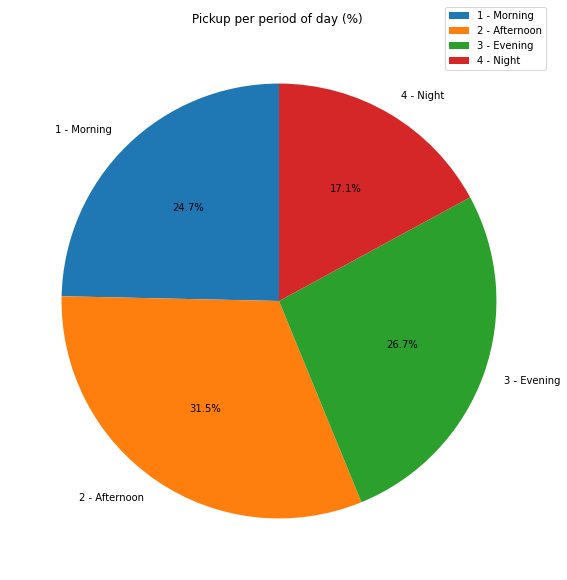

In [23]:
Pickups_period_perc = period_hour.groupby(['Day_period'])['Pickups_period (%)'].sum()

# Declaring indexes and values
period_hour_values = Pickups_period_perc.values
period_hour_index = Pickups_period_perc.index

#Show the relative weight of pickips trough the day
plt.figure(figsize = (10, 10))

plt.pie(Pickups_period_perc, 
        autopct = '%1.1f%%',
        labels = period_hour_index,
        startangle= 90
           )

plt.legend(period_hour_index, bbox_to_anchor=(1.0, 1.05))
plt.title("Pickup per period of day (%) ")
plt.show()

In [24]:
px.bar(period_hour, x = 'Day_period', y = 'Lat',title='Number of pickup per period of day', color='Lat')

In [25]:
print('* The major busy period during the day is afternoon, particularly at the end of afternoon.\n* It matches with end of the business work and the start of all kind of leisure.')

* The major busy period during the day is afternoon, particularly at the end of afternoon.
* It matches with end of the business work and the start of all kind of leisure.


## C) PICKUP ANALYSIS PER WEEK YEAR

In [26]:
#Groupby per week_y
week_y = dfa.groupby('Week_year')['Lat'].count().reset_index()

#Creation of column with the total of pickups
week_y['Total_pickups'] = week_y.sum()[1]

#Creation of column with of pickups per week_y in %
week_y['Pickups_week_y (%)'] = round((week_y['Lat']/week_y['Total_pickups'])*100,2)


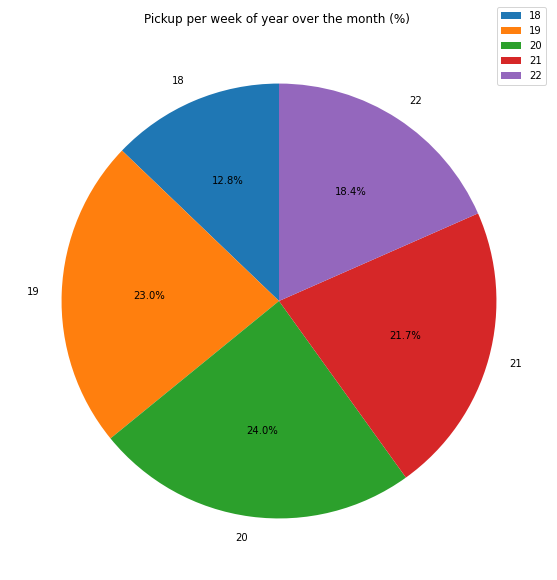

In [27]:
week_y_perc = week_y.groupby(['Week_year'])['Pickups_week_y (%)'].sum()

# Declaring indexes and values
week_y_values = week_y_perc.values
week_y_index = week_y_perc.index

plt.figure(figsize = (10, 10))

plt.pie(week_y_perc, 
        autopct = '%1.1f%%',
        labels = week_y_index,
        startangle= 90
           )

plt.legend(week_y_index, bbox_to_anchor=(1.0, 1.05))

plt.title("Pickup per week of year over the month (%) ")

plt.show()

In [28]:
px.bar(week_y, x = 'Week_year', y = 'Lat',title='Number of pickups per week of year over the month', color='Lat')

In [29]:
print('* The busiest week over the month of May that we have selected is 20.\n* We will select it for our map visualizations')


* The busiest week over the month of May that we have selected is 20.
* We will select it for our map visualizations


## D) PICKUP ANALYSIS PER DAY WEEK

In [30]:
#Groupby per Day_period
dayweek = dfa.groupby('Day_week')['Lat'].count().reset_index()

#Creation of column with the total of pickups
dayweek['Total_pickups'] = dayweek.sum()[1]

#Creation of column with of pickups per Day_period in %
dayweek['Pickups_dayweek (%)'] = round((dayweek['Lat']/dayweek['Total_pickups'])*100,2)


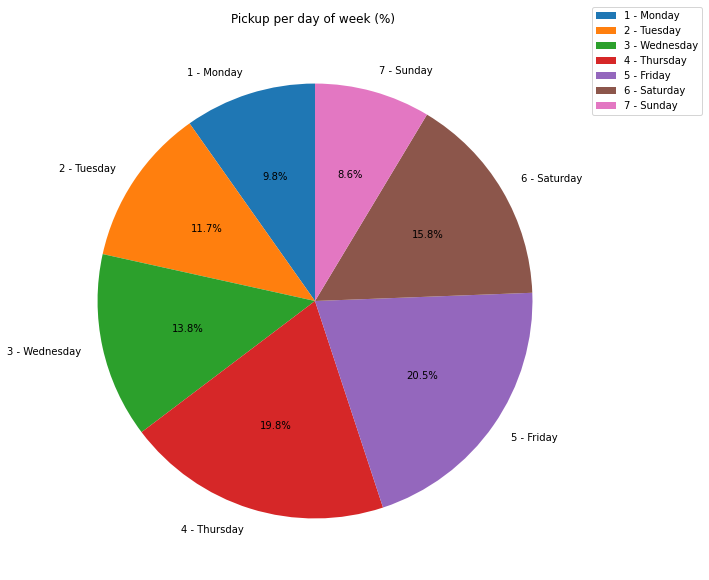

In [31]:
Pickups_pdayweek_perc = dayweek.groupby(['Day_week'])['Pickups_dayweek (%)'].sum()

# Declaring indexes and values
Pickups_pdayweek_values = Pickups_pdayweek_perc.values
Pickups_pdayweek_index = Pickups_pdayweek_perc.index

plt.figure(figsize = (10, 10))

plt.pie(Pickups_pdayweek_perc, 
        autopct = '%1.1f%%',
        labels = Pickups_pdayweek_index,
        startangle= 90
           )

plt.legend(Pickups_pdayweek_index, bbox_to_anchor=(1.0, 1.05))

plt.title("Pickup per day of week (%) ")

plt.show()

In [32]:
px.bar(dayweek, x = 'Day_week', y = 'Lat',title='Pickup per day of week ', color='Lat')

In [33]:
print('* Thursday and Friday are by far the thoughest days for Uber drivers.')

* Thursday and Friday are by far the thoughest days for Uber drivers.


## E) PICKUP ANALYSIS PER MONTHLY DAY

In [34]:
#Groupby per Day_period
daymonth = dfa.groupby('Day')['Lat'].count().reset_index()

#Creation of column with the total of pickups
daymonth['Total_pickups'] = daymonth.sum()[1]

#Creation of column with of pickups per Day_period in %
daymonth['Pickups_dayweek (%)'] = round((daymonth['Lat']/daymonth['Total_pickups'])*100,2)


In [35]:
px.bar(daymonth, x = 'Day', y = 'Lat',title='Pickup per monthly day ', color='Lat')

In [36]:
print('We see there is a weekly seasonality corresponding to the day of high volume demand (Thursday & Friday).')

We see there is a weekly seasonality corresponding to the day of high volume demand (Thursday & Friday).


## F) SAMPLING : PICKUP ON THE HOTEST HOUR OF THE MONTH

In [37]:
#Filter on Day
mask_day = dfa['Day'] == 16

#Filter for one specific Hour
mask_hour = dfa['Hour'] == 17

#Full filters
filters = (mask_day) & (mask_hour)

dfa_filter = dfa.loc[filters,:]
display(dfa_filter.sample(5))
dfa_filter.shape


,Date/Time,Lat,Lon,Base,Date,Day,Hour,Minute,Week_year,Day_week,Month,Day_period
19607,5/16/2014 17:20:00,40.7257,-74.0057,B02512,5/16/2014 17:20:00,16,17,20,20,5 - Friday,5 - May,2 - Afternoon
539424,5/16/2014 17:32:00,40.7513,-73.9940,B02682,5/16/2014 17:32:00,16,17,32,20,5 - Friday,5 - May,2 - Afternoon
170568,5/16/2014 17:20:00,40.7503,-73.9866,B02598,5/16/2014 17:20:00,16,17,20,20,5 - Friday,5 - May,2 - Afternoon
170861,5/16/2014 17:41:00,40.7646,-73.9707,B02598,5/16/2014 17:41:00,16,17,41,20,5 - Friday,5 - May,2 - Afternoon
539502,5/16/2014 17:38:00,40.7394,-73.9767,B02682,5/16/2014 17:38:00,16,17,38,20,5 - Friday,5 - May,2 - Afternoon


(2445, 12)

In [38]:
print(
    '      * We have selected the day "{}" of the month of "{}", regarding the graph shown before, it\'s the monthly busiest day.\n\
      * We centered the filter over the hour "{}" that is as well the pic of demands for pickups in New-York.\n\
      * The day period of our filter is "{}".'\
      .format(dfa_filter.iloc[0,5],dfa_filter.iloc[0,10],dfa_filter.iloc[0,6],dfa_filter.iloc[0,11])
     )

      * We have selected the day "16" of the month of "5 - May", regarding the graph shown before, it's the monthly busiest day.
      * We centered the filter over the hour "17" that is as well the pic of demands for pickups in New-York.
      * The day period of our filter is "2 - Afternoon".


In [39]:
fig = px.scatter_mapbox(dfa_filter, 
                            lat="Lat", 
                                lon="Lon", 
                                    zoom=8.5, 
                                        mapbox_style="carto-positron",
                                            title='Monthly hotest hour - All pickups'
                       )
fig.show()


### **4. Unsupervised Machine Learning algorithms & Clustering**
---

## A) K-MEANS ALGORITHM

### 1. Selection of $K$ optimal clusters 

### a). Elbow method 💪

In [40]:
X = dfa_filter.loc[:,['Lat','Lon']]

In [41]:
# Import K-Means 
from sklearn.cluster import KMeans

In [42]:
# Let's create a loop that will collect the Within-sum-of-square (wcss) for each value K 
# Let's use .inertia_ parameter to get the within sum of square value for each value K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 6.118966370593041
WCSS for K=2 --> 4.202788424182161
WCSS for K=3 --> 3.00663688151659
WCSS for K=4 --> 2.2041346720285295
WCSS for K=5 --> 1.7570675158036804
WCSS for K=6 --> 1.4384805886524379
WCSS for K=7 --> 1.1251062060002721
WCSS for K=8 --> 0.9327123595706924
WCSS for K=9 --> 0.8156298870622937
WCSS for K=10 --> 0.7012789372994173


In [43]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [44]:
print('* It\' quite hard to select the proper number of cluster, the line is not sharpe.\n* We will be using the Silhouette method to finf out which number f clusters to select.' )

* It' quite hard to select the proper number of cluster, the line is not sharpe.
* We will be using the Silhouette method to finf out which number f clusters to select.


### b). Silhouette Method 👥

In [45]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.7768048702113246
Silhouette score for K=3 is 0.44752907289383315
Silhouette score for K=4 is 0.4554235424728343
Silhouette score for K=5 is 0.4659456548238945
Silhouette score for K=6 is 0.4371785552745185
Silhouette score for K=7 is 0.37808008578154684
Silhouette score for K=8 is 0.43482547288599105
Silhouette score for K=9 is 0.4038843736132332
Silhouette score for K=10 is 0.40513729326772296


In [92]:
#Create a DataFrame where we will input the probability to have 'k' clusters
k_selection = {'K' : k,'Score' : sil}
df_select = pd.DataFrame(data=k_selection)

#Selection of the better K
sort_select = df_select.sort_values(by=['Score'], ascending=False)
best_k = sort_select.loc[:1,:].values[1][0]
best_k = int(best_k) #Transform to integer for kmeans
best_score = sort_select.loc[:1,:].values[1][1]

print('* The silhouette score shows that the best K is {} with a score of {}'.format(best_k,round(best_score,2)))

* The silhouette score shows that the best K is 5 with a score of 0.47


In [47]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
fig.show(renderer="iframe")

In [48]:
# Instanciate KMeans with k=n and initialisation with k-means++ 
kmeans = KMeans(n_clusters=best_k, random_state=0, init="k-means++")

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [49]:
print('The optimal number of cluser for the K-Mean alorithm is 5.')

The optimal number of cluser for the K-Mean alorithm is 5.


In [50]:
#Implementing the clusters
X['Cluster'] = kmeans.labels_
X['Cluster'] = X['Cluster']+1

#Adding some columns
X['Day'] = dfa_filter['Day']
X['Hour'] = dfa_filter['Hour']
X['Minute'] = dfa_filter['Minute']


In [52]:

fig = px.scatter_mapbox(X,
                        lat='Lat',
                        lon='Lon',
                        animation_frame = 'Day',
                       # animation_group = 'heure',
                        color='Cluster',
                        mapbox_style = 'open-street-map',
                        
                        zoom=8.75,
                        title = 'Monthly hotest hour - Clustering')
fig.show(renderer='iframe')

### 2. Apply K-Means methods to dynamic graphs 

## <span style="color:blue">Dynamic graphs</span>

## <span style="color:blue">I. One Day</span>

In [53]:
#Using the same mask day for 16
dfa_filter_day = dfa.loc[mask_day,:]

#We call this filtered dataset as D for Day
D = dfa_filter_day.loc[:,['Lat','Lon']]

In [54]:
wcss2 =  []
k2 = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(D)
    wcss2.append(kmeans.inertia_)
    k2.append(i)
    print("WCSS for K={} --> {}".format(i, wcss2[-1]))

WCSS for K=1 --> 106.14078350071107
WCSS for K=2 --> 67.74631763886886
WCSS for K=3 --> 49.66613111318496
WCSS for K=4 --> 40.323995074796414
WCSS for K=5 --> 30.842441543003517
WCSS for K=6 --> 24.710534791302265
WCSS for K=7 --> 21.54754266827661
WCSS for K=8 --> 18.88674663197358
WCSS for K=9 --> 16.268672462876786
WCSS for K=10 --> 14.335792911798512


In [55]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k2)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [100]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil2 = []
k2 = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(D)
    sil2.append(silhouette_score(D, kmeans.predict(D)))
    k2.append(i)
    print("Silhouette score for K={} is {}".format(i, sil2[-1]))

Silhouette score for K=2 is 0.5502200253775127
Silhouette score for K=3 is 0.4351719286736168
Silhouette score for K=4 is 0.4448266203347618
Silhouette score for K=5 is 0.4272927635674541
Silhouette score for K=6 is 0.4557684772345857
Silhouette score for K=7 is 0.4801525312954849
Silhouette score for K=8 is 0.5112800862191189
Silhouette score for K=9 is 0.5139568180320434
Silhouette score for K=10 is 0.5218895017504465


In [101]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil2)
k_frame = pd.Series(k2)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
fig.show(renderer="iframe")

In [102]:
k2_selection = {'K' : k2,'Score' : sil2}
df_select_day = pd.DataFrame(data=k2_selection)

#Selection of the best K for a filtered Day
sort_select = df_select_day.sort_values(by=['Score'], ascending=False)
best_k_day = sort_select.loc[:1,:].values[1][0]
best_k_day = int(best_k_day) #Transform to integer for kmeans
best_score_day = sort_select.loc[:1,:].values[1][1]

print('The silhouette score shows that the best K is {} with a score of {}'.format(best_k_day,round(best_score_day,2)))

The silhouette score shows that the best K is 10 with a score of 0.52


In [103]:
# Instanciate KMeans with k=n and initialisation with k-means++
kmeans = KMeans(n_clusters=best_k_day, random_state=0, init="k-means++")

# Fit kmeans to our dataset
kmeans.fit(D)

KMeans(n_clusters=10, random_state=0)

In [60]:
#Implementing the clusters
D['Cluster'] = kmeans.labels_
D['Cluster'] = D['Cluster']+1

#Adding some columns
D['Day'] = dfa_filter_day['Day']
D['Hour'] = dfa_filter_day['Hour']


In [61]:
#Applying a sorting method over the Hour column 
D = D.sort_values(by=['Hour'], ascending=True)

#Show the cluster on map
fig = px.scatter_mapbox(D, 
        lat='Lat', 
            lon='Lon', 
                color='Cluster', 
                    zoom=8.5, 
                        mapbox_style='open-street-map', 
                            #color_continuous_scale = 'reds',
                               animation_frame = 'Hour',
                                        title='One day of pickups'
                       )
fig.show()

In [62]:
print('We can see that we have more clusters when we analyse one full day ({} clusters) than when we focus on one specific hour ({} clusters) even if it\'s a busy hour.'.format(best_k, best_k_day))
print('The density seems higher that could explain the reduction of clusters.')

We can see that we have more clusters when we analyse one full day (5 clusters) than when we focus on one specific hour (8 clusters) even if it's a busy hour.
The density seems higher that could explain the reduction of clusters.


## <span style="color:blue">II. Weekly pickups</span>

In [90]:
dfa.sample(5)

,Date/Time,Lat,Lon,Base,Date,Day,Hour,Minute,Week_year,Day_week,Month,Day_period
81287,5/6/2014 17:56:00,40.7553,-73.9763,B02598,5/6/2014 17:56:00,6,17,56,19,2 - Tuesday,5 - May,2 - Afternoon
313921,5/5/2014 18:25:00,40.7357,-73.9928,B02617,5/5/2014 18:25:00,5,18,25,19,1 - Monday,5 - May,3 - Evening
647515,5/15/2014 21:27:00,40.7153,-74.0152,B02764,5/15/2014 21:27:00,15,21,27,20,4 - Thursday,5 - May,3 - Evening
133164,5/12/2014 15:59:00,40.7479,-74.0093,B02598,5/12/2014 15:59:00,12,15,59,20,1 - Monday,5 - May,2 - Afternoon
295383,5/31/2014 21:06:00,40.7624,-73.9921,B02598,5/31/2014 21:06:00,31,21,6,22,6 - Saturday,5 - May,3 - Evening


In [64]:
#We will apply a filter over the week and the Day_period
mask_week = (dfa['Week_year'] == 20) & (dfa['Day_period'] == '2 - Afternoon')
dfa_filter_week = dfa.loc[mask_week,:]

W = dfa_filter_week.loc[:,['Lat','Lon']]
W.shape

(48590, 2)

In [65]:
wcss3 =  []
k3 = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(W)
    wcss3.append(kmeans.inertia_)
    k3.append(i)
    print("WCSS for K={} --> {}".format(i, wcss3[-1]))

WCSS for K=1 --> 195.56008957490656
WCSS for K=2 --> 119.42934425028592
WCSS for K=3 --> 89.39554604793513
WCSS for K=4 --> 68.85576594822871
WCSS for K=5 --> 50.92337357465443
WCSS for K=6 --> 41.668486992887196
WCSS for K=7 --> 35.95595064400193
WCSS for K=8 --> 31.13157517153056
WCSS for K=9 --> 26.85181869360926
WCSS for K=10 --> 24.441237365294775


In [66]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k3)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [104]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil3 = []
k3 = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(W)
    sil3.append(silhouette_score(W, kmeans.predict(W)))
    k3.append(i)
    print("Silhouette score for K={} is {}".format(i, sil3[-1]))

Silhouette score for K=2 is 0.49584375820962706
Silhouette score for K=3 is 0.43557101160601175
Silhouette score for K=4 is 0.48013360166279134
Silhouette score for K=5 is 0.5585970002058859
Silhouette score for K=6 is 0.6078523018063868
Silhouette score for K=7 is 0.6670335055527735
Silhouette score for K=8 is 0.7077190877968249
Silhouette score for K=9 is 0.7228262047163921
Silhouette score for K=10 is 0.7679852444981161


In [105]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil3)
k_frame = pd.Series(k3)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
fig.show(renderer="iframe")

In [106]:
k3_selection = {'K' : k3,'Score' : sil3}
df_select_week = pd.DataFrame(data=k3_selection)

#Selection of the better K
sort_select = df_select_week.sort_values(by=['Score'], ascending=False)
best_k_week = sort_select.loc[:1,:].values[1][0]
best_k_week = int(best_k_week) #Transform to integer for kmeans
best_score_week = sort_select.loc[:1,:].values[1][1]

print('The silhouette score shows that the best K is {} with a score of {}'.format(best_k_week,round(best_score_week,2)))

The silhouette score shows that the best K is 9 with a score of 0.72


In [107]:
# Instanciate KMeans with k=3 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=best_k_week, random_state=0, init="k-means++")

# Fit kmeans to our dataset
kmeans.fit(W)

KMeans(n_clusters=9, random_state=0)

In [108]:
W['Cluster'] = kmeans.labels_
W['Cluster'] = W['Cluster']+1


W['Day'] = dfa_filter_week['Day']
W['Week_year'] = dfa_filter_week['Week_year']


In [109]:
#Sorting on 'Day' to have a proper dynamic map
W = W.sort_values(by=['Day'], ascending=True)


fig = px.scatter_mapbox(W, 
        lat='Lat', 
            lon='Lon', 
                color='Cluster', 
                    zoom=8.0, 
                        mapbox_style='carto-positron', 
                            #color_continuous_scale = 'Reds',
                                hover_name="Cluster",
                                       animation_frame = 'Day',
                                        title='Weekly pickups on the afternoon'
                       )
fig.show()

## B) DBSCAN ALGORITHM

### 1. Clustering by density

# Apply DBSCAN 🚀🚀

## <span style="color:blue">HOT ZONES</span>

- Hot-zones are areas where there is a density particularly high centered. 
- It means that we would exclude lot of elements. They will be concidered as outliers

## <span style="color:blue">I. CLUSTER OVER ONE FULL WEEK</span>

In [73]:
#Set parameters to define the clusters' density
EPSW = 0.00069
MIN_SW = 240

In [74]:
#Applying a filter over one specific week
Week20 = dfa['Week_year'] == 20
W20 = dfa.loc[Week20,:]
Loc20 = W20.loc[:,['Lat','Lon']]

# Instanciate DBSCAN
db = DBSCAN(
            eps = EPSW, 
                min_samples = MIN_SW, 
                    metric = 'manhattan', 
                        #algorithm = 'brute'
                                               )


# Apply the parameters od DBSCAN on the Lat / Lon
db.fit(Loc20)

#Filter the week 20 
Loc20['Cluster'] = db.labels_
Loc20['Day'] = W20['Day']
Loc20['Hour'] = W20['Hour']

labels = db.labels_
unique_lab = set(Loc20['Cluster'])
nb_cluster = len(unique_lab)
n_noise_points = list(labels).count(-1)
print('Nombres de clusters: {}'.format(nb_cluster))
print('Nombres de bruits: {} ({} %)'.format(n_noise_points,(round(n_noise_points/len(Loc20)*100,1))))
print('Hot zones represent {} % of all rides'.format(round(1-(n_noise_points/len(Loc20)),2)))
print('-----------------------------------------------')

#Sorting on 'Day' to have a proper dynamic map
Loc20 = Loc20.sort_values(by=['Day'], ascending=True)

fig = px.scatter_mapbox(Loc20[Loc20.Cluster != -1],
                        lat='Lat',
                            lon='Lon',
                                color='Cluster',
                                    animation_frame = 'Day',
                                        hover_name="Cluster",
                                        zoom=9.7,
                                            mapbox_style = 'carto-positron')

fig.show(renderer='iframe')

Nombres de clusters: 19
Nombres de bruits: 145741 (93.0 %)
Hot zones represent 0.07 % of all rides
-----------------------------------------------


In [75]:
print('')
print('* We have discovered 18 hotspots where the density is very high.')
print('------------------------------------------------------------------')
print('* Some of them are located around the airports: {}%\n- Newark Liberty (1) \n- John.F Kennedy (4)\n- LaGuardia (4)'.format(round((9/18)*100,2) 
                                                                                                                                ))
print('')
print('* Some of them are located around Central Park: {}%\n- 5th Avenue (1)\n- Madison Avenue (1)\n- Upper East Side (1)'.format(round((3/18)*100,2) 
                                                                                                                                ))
print('')
print('* The remaining clusters are located in the center of New York: {}%\n- South-West (4)\n- Pennsylvania Station (1)\n- Midtown-East(1)\n- Park-Avenue (1)'.format(round((7/18)*100,2) 
                                                                                                                                ))


* We have discovered 18 hotspots where the density is very high.
------------------------------------------------------------------
* Some of them are located around the airports: 50.0%
- Newark Liberty (1) 
- John.F Kennedy (4)
- LaGuardia (4)

* Some of them are located around Central Park: 16.67%
- 5th Avenue (1)
- Madison Avenue (1)
- Upper East Side (1)

* The remaining clusters are located in the center of New York: 38.89%
- South-West (4)
- Pennsylvania Station (1)
- Midtown-East(1)
- Park-Avenue (1)


## <span style="color:blue">II. ONE WEEK : PERIOD OF DAY</span>

### <span style="color:blue">HOT-ZONES AT NIGHT</span>

In [76]:
#Set parameters to define the clusters' density
EPSWN = 0.002
MIN_SWN = 250

In [77]:


night = W20['Day_period'] == '4 - Night'
W20_night = W20.loc[night,:]
W20_night
Loc20_night = W20_night.loc[:,['Lat','Lon']]


# Instanciate DBSCAN
db = DBSCAN(
            eps = EPSWN, 
                min_samples = MIN_SWN, 
                    metric = 'manhattan', 
                        #algorithm = 'brute'
                                               )


# Apply the parameters od DBSCAN on the Lat / Lon
db.fit(Loc20_night)



#Filter the week 20 
Loc20_night['Cluster'] = db.labels_
Loc20_night['Day'] = W20_night['Day']
Loc20_night['Hour'] = W20_night['Hour']
Loc20_night['Date/Time'] = W20_night['Date/Time']

labels = db.labels_
unique_lab = set(Loc20_night['Cluster'])
nb_cluster = len(unique_lab)
n_noise_points = list(labels).count(-1)
print('Nombres de clusters: {}'.format(nb_cluster))
print('Nombres de bruits: {} ({} %)'.format(n_noise_points,(round(n_noise_points/len(Loc20_night)*100,1))))
print('-----------------------------------------------')

Loc20_night = Loc20_night.sort_values(by=['Date/Time'], ascending=True)

fig = px.scatter_mapbox(Loc20_night[Loc20_night.Cluster != -1],
                        lat='Lat',
                            lon='Lon',
                                color='Cluster',
                                    animation_frame = 'Hour',
                                        zoom=9.7,
                                            hover_name="Cluster",
                                            mapbox_style = 'carto-darkmatter')

fig.show(renderer='iframe')

Nombres de clusters: 7
Nombres de bruits: 23113 (87.1 %)
-----------------------------------------------


In [78]:
print('')
print('* We have discovered 6 hotspots during the night (22pm to 5am) where the density is very high.')
print('------------------------------------------------------------------')
print('* Some of them are located around the airports: {}%\n- John.F Kennedy (1)\n- LaGuardia (1)'.format(round((2/6)*100,2) 
                                                                                                                                ))
print('')
print('* The remaining clusters are located in the center of New York: {}%\n- South-West (2)\n- South (2)'.format(round((4/6)*100,2) 
                                                                                                                                ))


* We have discovered 6 hotspots during the night (22pm to 5am) where the density is very high.
------------------------------------------------------------------
* Some of them are located around the airports: 33.33%
- John.F Kennedy (1)
- LaGuardia (1)

* The remaining clusters are located in the center of New York: 66.67%
- South-West (2)
- South (2)


### <span style="color:blue">HOT-ZONES ON THE MORNING</span>

In [79]:
#Set parameters to define the clusters' density
EPSWM = 0.0024
MIN_SWM = 250

In [80]:


morning = W20['Day_period'] == '1 - Morning'

W20_morning = W20.loc[morning,:]

Loc20_morning = W20_morning.loc[:,['Lat','Lon']]


# Instanciate DBSCAN
db = DBSCAN(
            eps = EPSWM, 
                min_samples = MIN_SWM, 
                    metric = 'manhattan', 
                        #algorithm = 'brute'
                                               )


# Apply the parameters od DBSCAN on the Lat / Lon
db.fit(Loc20_morning)

#Filter the week 20 
Loc20_morning['Cluster'] = db.labels_
Loc20_morning['Day'] = W20_morning['Day']
Loc20_morning['Hour'] = W20_morning['Hour']
Loc20_morning['Date/Time'] = W20_morning['Date/Time']

labels = db.labels_
unique_lab = set(Loc20_morning['Cluster'])
nb_cluster = len(unique_lab)
n_noise_points = list(labels).count(-1)
print('Nombres de clusters: {}'.format(nb_cluster))
print('Nombres de bruits: {} ({} %)'.format(n_noise_points,(round(n_noise_points/len(Loc20_morning)*100,1))))
print('-----------------------------------------------')


Loc20_morning = Loc20_morning.sort_values(by=['Hour'], ascending=True)

fig = px.scatter_mapbox(Loc20_morning[Loc20_morning.Cluster != -1],
                            lat='Lat',
                                lon='Lon',
                                    color='Cluster',
                                        animation_frame = 'Hour',
                                            zoom=10.9,
                                                hover_name="Cluster",
                                                mapbox_style = 'carto-positron',
                                                    title='One week pickups on the morning'
                       )

fig.show(renderer='iframe')

Nombres de clusters: 9
Nombres de bruits: 33986 (88.5 %)
-----------------------------------------------


In [81]:
print('')
print('* We have discovered 8 hotspots during the morning (6am to 12pm) where  the density is very high.')
print('------------------------------------------------------------------')
print('* Some of them are located around the airports: {}%\n- LaGuardia (2)'.format(round((2/8)*100,2) 
                                                                                                                                ))
print('')
print('* Some of them are located around Central Park, at the South: {}%\n- 5th Avenue (1)\n- Park-Avenue (1)'.format(round((2/8)*100,2) 
                                                                                                                                ))
print('')
print('* The remaining clusters are located in the center of New York: {}%\n- South-Center (2)\n- Pennsylvania Station (1)\n- Mildtown-East(1)'.format(round((4/8)*100,2) 
                                                                                                                                ))


* We have discovered 8 hotspots during the morning (6am to 12pm) where  the density is very high.
------------------------------------------------------------------
* Some of them are located around the airports: 25.0%
- LaGuardia (2)

* Some of them are located around Central Park, at the South: 25.0%
- 5th Avenue (1)
- Park-Avenue (1)

* The remaining clusters are located in the center of New York: 50.0%
- South-Center (2)
- Pennsylvania Station (1)
- Mildtown-East(1)


### <span style="color:blue">HOT-ZONES ON THE AFTERNOON</span>

In [82]:
#Set parameters to define the clusters' density
EPSWA = 0.0015
MIN_SWA = 250

In [83]:


afternoon = W20['Day_period'] == '2 - Afternoon'

W20_afternoon = W20.loc[afternoon,:]

Loc20_afternoon = W20_afternoon.loc[:,['Lat','Lon']]


# Instanciate DBSCAN
db = DBSCAN(
            eps = EPSWA, 
                min_samples = MIN_SWA, 
                    metric = 'manhattan', 
                        #algorithm = 'brute'
                                               )


# Apply the parameters od DBSCAN on the Lat / Lon
db.fit(Loc20_afternoon)

#Filter the week 20 
Loc20_afternoon['Cluster'] = db.labels_
Loc20_afternoon['Day'] = W20_afternoon['Day']
Loc20_afternoon['Hour'] = W20_afternoon['Hour']
Loc20_afternoon['Date/Time'] = W20_afternoon['Date/Time']

labels = db.labels_
unique_lab = set(Loc20_afternoon['Cluster'])
nb_cluster = len(unique_lab)
n_noise_points = list(labels).count(-1)
print('Nombres de clusters: {}'.format(nb_cluster))
print('Nombres de bruits: {} ({} %)'.format(n_noise_points,(round(n_noise_points/len(Loc20_afternoon)*100,1))))
print('-----------------------------------------------')

Loc20_afternoon = Loc20_afternoon.sort_values(by=['Hour'], ascending=True)

fig = px.scatter_mapbox(Loc20_afternoon[Loc20_afternoon.Cluster != -1],
                            lat='Lat',
                                lon='Lon',
                                    color='Cluster',
                                        animation_frame = 'Hour',
                                            zoom=9.2,
                                                hover_name="Cluster",
                                                mapbox_style = 'carto-positron',
                                                    title='One week pickups on the afternoon'
                       )

fig.show(renderer='iframe')

Nombres de clusters: 9
Nombres de bruits: 42819 (88.1 %)
-----------------------------------------------


In [84]:
print('')
print('* We have discovered 8 hotspots during the afternoon (1pm to 5pm) where  the density is very high.')
print('------------------------------------------------------------------')
print('* Some of them are located around the airports: {}%\n- John.F Kennedy (1)\n- LaGuardia (2)'.format(round((3/8)*100,2) 
                                                                                                                                ))
print('')
print('* Some of them are located around Central Park, at the South-East: {}%\n- 5th Avenue / Madison-Avenue / Park-Avenue (3)'.format(round((3/8)*100,2) 
                                                                                                                                ))
print('')
print('* The remaining clusters are located in the center of New York: {}%\n- Prince Street (1)\n- Pennsylvania Station (1)'.format(round((2/8)*100,2) 
                                                                                                                                ))


* We have discovered 8 hotspots during the afternoon (1pm to 5pm) where  the density is very high.
------------------------------------------------------------------
* Some of them are located around the airports: 37.5%
- John.F Kennedy (1)
- LaGuardia (2)

* Some of them are located around Central Park, at the South-East: 37.5%
- 5th Avenue / Madison-Avenue / Park-Avenue (3)

* The remaining clusters are located in the center of New York: 25.0%
- Prince Street (1)
- Pennsylvania Station (1)


### <span style="color:blue">HOT-ZONES ON THE EVENING</span>

In [85]:
#Set parameters to define the clusters' density
EPSWE = 0.0015
MIN_SWE = 250

In [86]:

evening = W20['Day_period'] == '3 - Evening'

W20_evening = W20.loc[evening,:]

Loc20_evening = W20_evening.loc[:,['Lat','Lon']]


# Instanciate DBSCAN
db = DBSCAN(
            eps = EPSWE, 
                min_samples = MIN_SWE, 
                    metric = 'manhattan', 
                        #algorithm = 'brute'
                                               )


# Apply the parameters od DBSCAN on the Lat / Lon
db.fit(Loc20_evening)

#Filter the week 20 
Loc20_evening['Cluster'] = db.labels_
Loc20_evening['Day'] = W20_evening['Day']
Loc20_evening['Hour'] = W20_evening['Hour']
Loc20_evening['Date/Time'] = W20_evening['Date/Time']

labels = db.labels_
unique_lab = set(Loc20_evening['Cluster'])
nb_cluster = len(unique_lab)
n_noise_points = list(labels).count(-1)
print('Nombres de clusters: {}'.format(nb_cluster))
print('Nombres de bruits: {} ({} %)'.format(n_noise_points,(round(n_noise_points/len(Loc20_evening)*100,1))))
print('-----------------------------------------------')

Loc20_evening = Loc20_evening.sort_values(by=['Hour'], ascending=True)

fig = px.scatter_mapbox(Loc20_evening[Loc20_evening.Cluster != -1],
                            lat='Lat',
                                lon='Lon',
                                    color='Cluster',
                                        animation_frame = 'Hour',
                                            zoom=9.3,
                                                hover_name="Cluster",
                                                mapbox_style = 'carto-positron',
                                                    title='One week pickups on the evening'
                       )

fig.show(renderer='iframe')

Nombres de clusters: 8
Nombres de bruits: 39928 (92.3 %)
-----------------------------------------------


In [87]:
len(Loc20_evening)

43261

In [88]:
print('')
print('* We have discovered 7 hotspots during the evening (6pm to 9pm) where the density is very high.')
print('------------------------------------------------------------------')
print('* Some of them are located around the airports: {}%\n- John.F Kennedy (1)\n- LaGuardia (2)'.format(round((3/7)*100,2) 
                                                                                                                                ))
print('')
print('* Some of them are located around Central Park, at the South-East: {}%\n- 5th Avenue (1)\n- Midtown (1)\n- Park-Avenue (1)'.format(round((3/7)*100,2) 
                                                                                                                                ))
print('')
print('* The remaining clusters are located in the center of New York: {}%\n- South-Ouest (1)'.format(round((1/8)*100,2) 
                                                                                                                                ))


* We have discovered 7 hotspots during the evening (6pm to 9pm) where the density is very high.
------------------------------------------------------------------
* Some of them are located around the airports: 42.86%
- John.F Kennedy (1)
- LaGuardia (2)

* Some of them are located around Central Park, at the South-East: 42.86%
- 5th Avenue (1)
- Midtown (1)
- Park-Avenue (1)

* The remaining clusters are located in the center of New York: 12.5%
- South-Ouest (1)



### **5. Conclusion**
---

Our conclusions after the review of this dataset; Uber's pickups for the *month of May 2014*.

The analysis shows that there is a *diversity of hotzones* depending on the week, day, hour and the month period.

We have highlighted the major hotzones with high density no matter the period, there are **19 hotzones**.

Then, we focused our research on specific areas at specific period of time.

We can easily underline that the above areas are the most dynamic places where Uber drivers would have the highest chance to get rides : 
- ***New York airports***
- ***South-Ouest of Manhatthan*** 
- ***Pennsylvania Station***
- ***South-East of Central Park*** 

The Team Data of Uber, must definitely tells the Operation Team to redirect as mainy available drivers possible to those hotspots.

It will for sure increase Uber sales and improve client satisfaction.